## Imports und Weissemodell

In [2]:
import modelbase
import modelbase.ratelaws as rl
from weisse import WeisseBaseModel, defaultParameters

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import seaborn as sns
import pandas as pd
import qtb_plot


Could not load modelbase.assimulate. Sundials support disabled.


In [3]:
cl = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq']

### plot Art

In [4]:
qtb_plot.set("notebook")

### model einlesen

In [5]:

m = WeisseBaseModel()
s = modelbase.Simulator(m)
#                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])
changedValuesOverTimeArray = s.timeCourse(np.linspace(0,10000,100),weise_values);

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


In [45]:
s.getY()[]

array([3.10961920e+04, 4.32975020e+04, 8.51455800e+03, 4.93330000e+01,
       4.93330000e+01, 8.81196000e+03, 3.48675000e+02, 0.00000000e+00,
       3.57898000e+02, 0.00000000e+00, 4.14000000e-02, 4.71364000e+02,
       4.71364000e+02, 4.71364000e+02, 1.25979633e+03, 1.00000000e+00,
       8.90138069e-03])

In [49]:
s.getRate("vimp")[-1]

4852566.1910333345

In [48]:
m.stoichiometries

{'vimp': {'si': 1},
 'vcat': {'si': -1, 'a': 0.5},
 'vr': {'a': -7459, 'pr': 2, 'mr': 1, 'cr': -1},
 'vt': {'a': -300, 'pr': 1, 'pt': 1, 'mt': 1, 'ct': -1},
 'vm': {'a': -300, 'pr': 1, 'pm': 1, 'mm': 1, 'cm': -1},
 'vq': {'a': -300, 'pr': 1, 'pq': 1, 'mq': 1, 'cq': -1},
 'cbur': {'pr': -1, 'mr': -1, 'cr': 1},
 'cbut': {'pr': -1, 'mt': -1, 'ct': 1},
 'cbum': {'pr': -1, 'mm': -1, 'cm': 1},
 'cbuq': {'pr': -1, 'mq': -1, 'cq': 1},
 'omegar': {'mr': 1},
 'degmr': {'mr': -1},
 'omegat': {'mt': 1},
 'degmt': {'mt': -1},
 'omegam': {'mm': 1},
 'degmm': {'mm': -1},
 'omegaq': {'mq': 1},
 'degmq': {'mq': -1},
 'dilution_si': {'si': -1},
 'dilution_a': {'a': -1},
 'dilution_mr': {'mr': -1},
 'dilution_mt': {'mt': -1},
 'dilution_mm': {'mm': -1},
 'dilution_mq': {'mq': -1},
 'dilution_cr': {'cr': -1},
 'dilution_ct': {'ct': -1},
 'dilution_cm': {'cm': -1},
 'dilution_cq': {'cq': -1},
 'dilution_pr': {'pr': -1},
 'dilution_pt': {'pt': -1},
 'dilution_pm': {'pm': -1},
 'dilution_pq': {'pq': -1}}

### Funktion für Kontrollkoefizienten

In [6]:
def konzenC(vt,x):
    # parameter den ich verändere
    oV = defaultParameters[vt]
    # wachstumswerte
    ov = s.getY()[-1]#s.results[-1]['y'][-1]
    # um prozentzahl erhöhen oder erniedrigen
    d1V = oV*(1+(x*0.01))
    d2V = oV*(1-(x*0.01))
    
    def dv(vt):
        s1 = modelbase.Simulator(m)
        s1.model.par.update({vt:d1V})
        s1.timeCourse(np.linspace(0,3000,10),weise_values)
        a = s1.getY()[-1]
        
        s2 = modelbase.Simulator(m)
        s2.model.par.update({vt:d2V})
        s2.timeCourse(np.linspace(0,3000,10),weise_values)
        b = s2.getY()[-1]
        
        s1.model.par.update({vt: oV})
        s2.model.par.update({vt: oV})
        
        #print(a)
        #print(b)
        #print(a-b)
        
        return a-b
    return (dv(vt)/ov)*(oV/(d1V-d2V))

### loop über alle Raten

In [7]:
parameter = ['dm','gammamax', 'vt', 'vm', 'wr', 'wt', 'wm', 'wq','kb', 'ku']

konzcoalle = []

for i in parameter:
    konzcoalle.append(konzenC(i,1))
    
konzcoalle = np.array(konzcoalle)

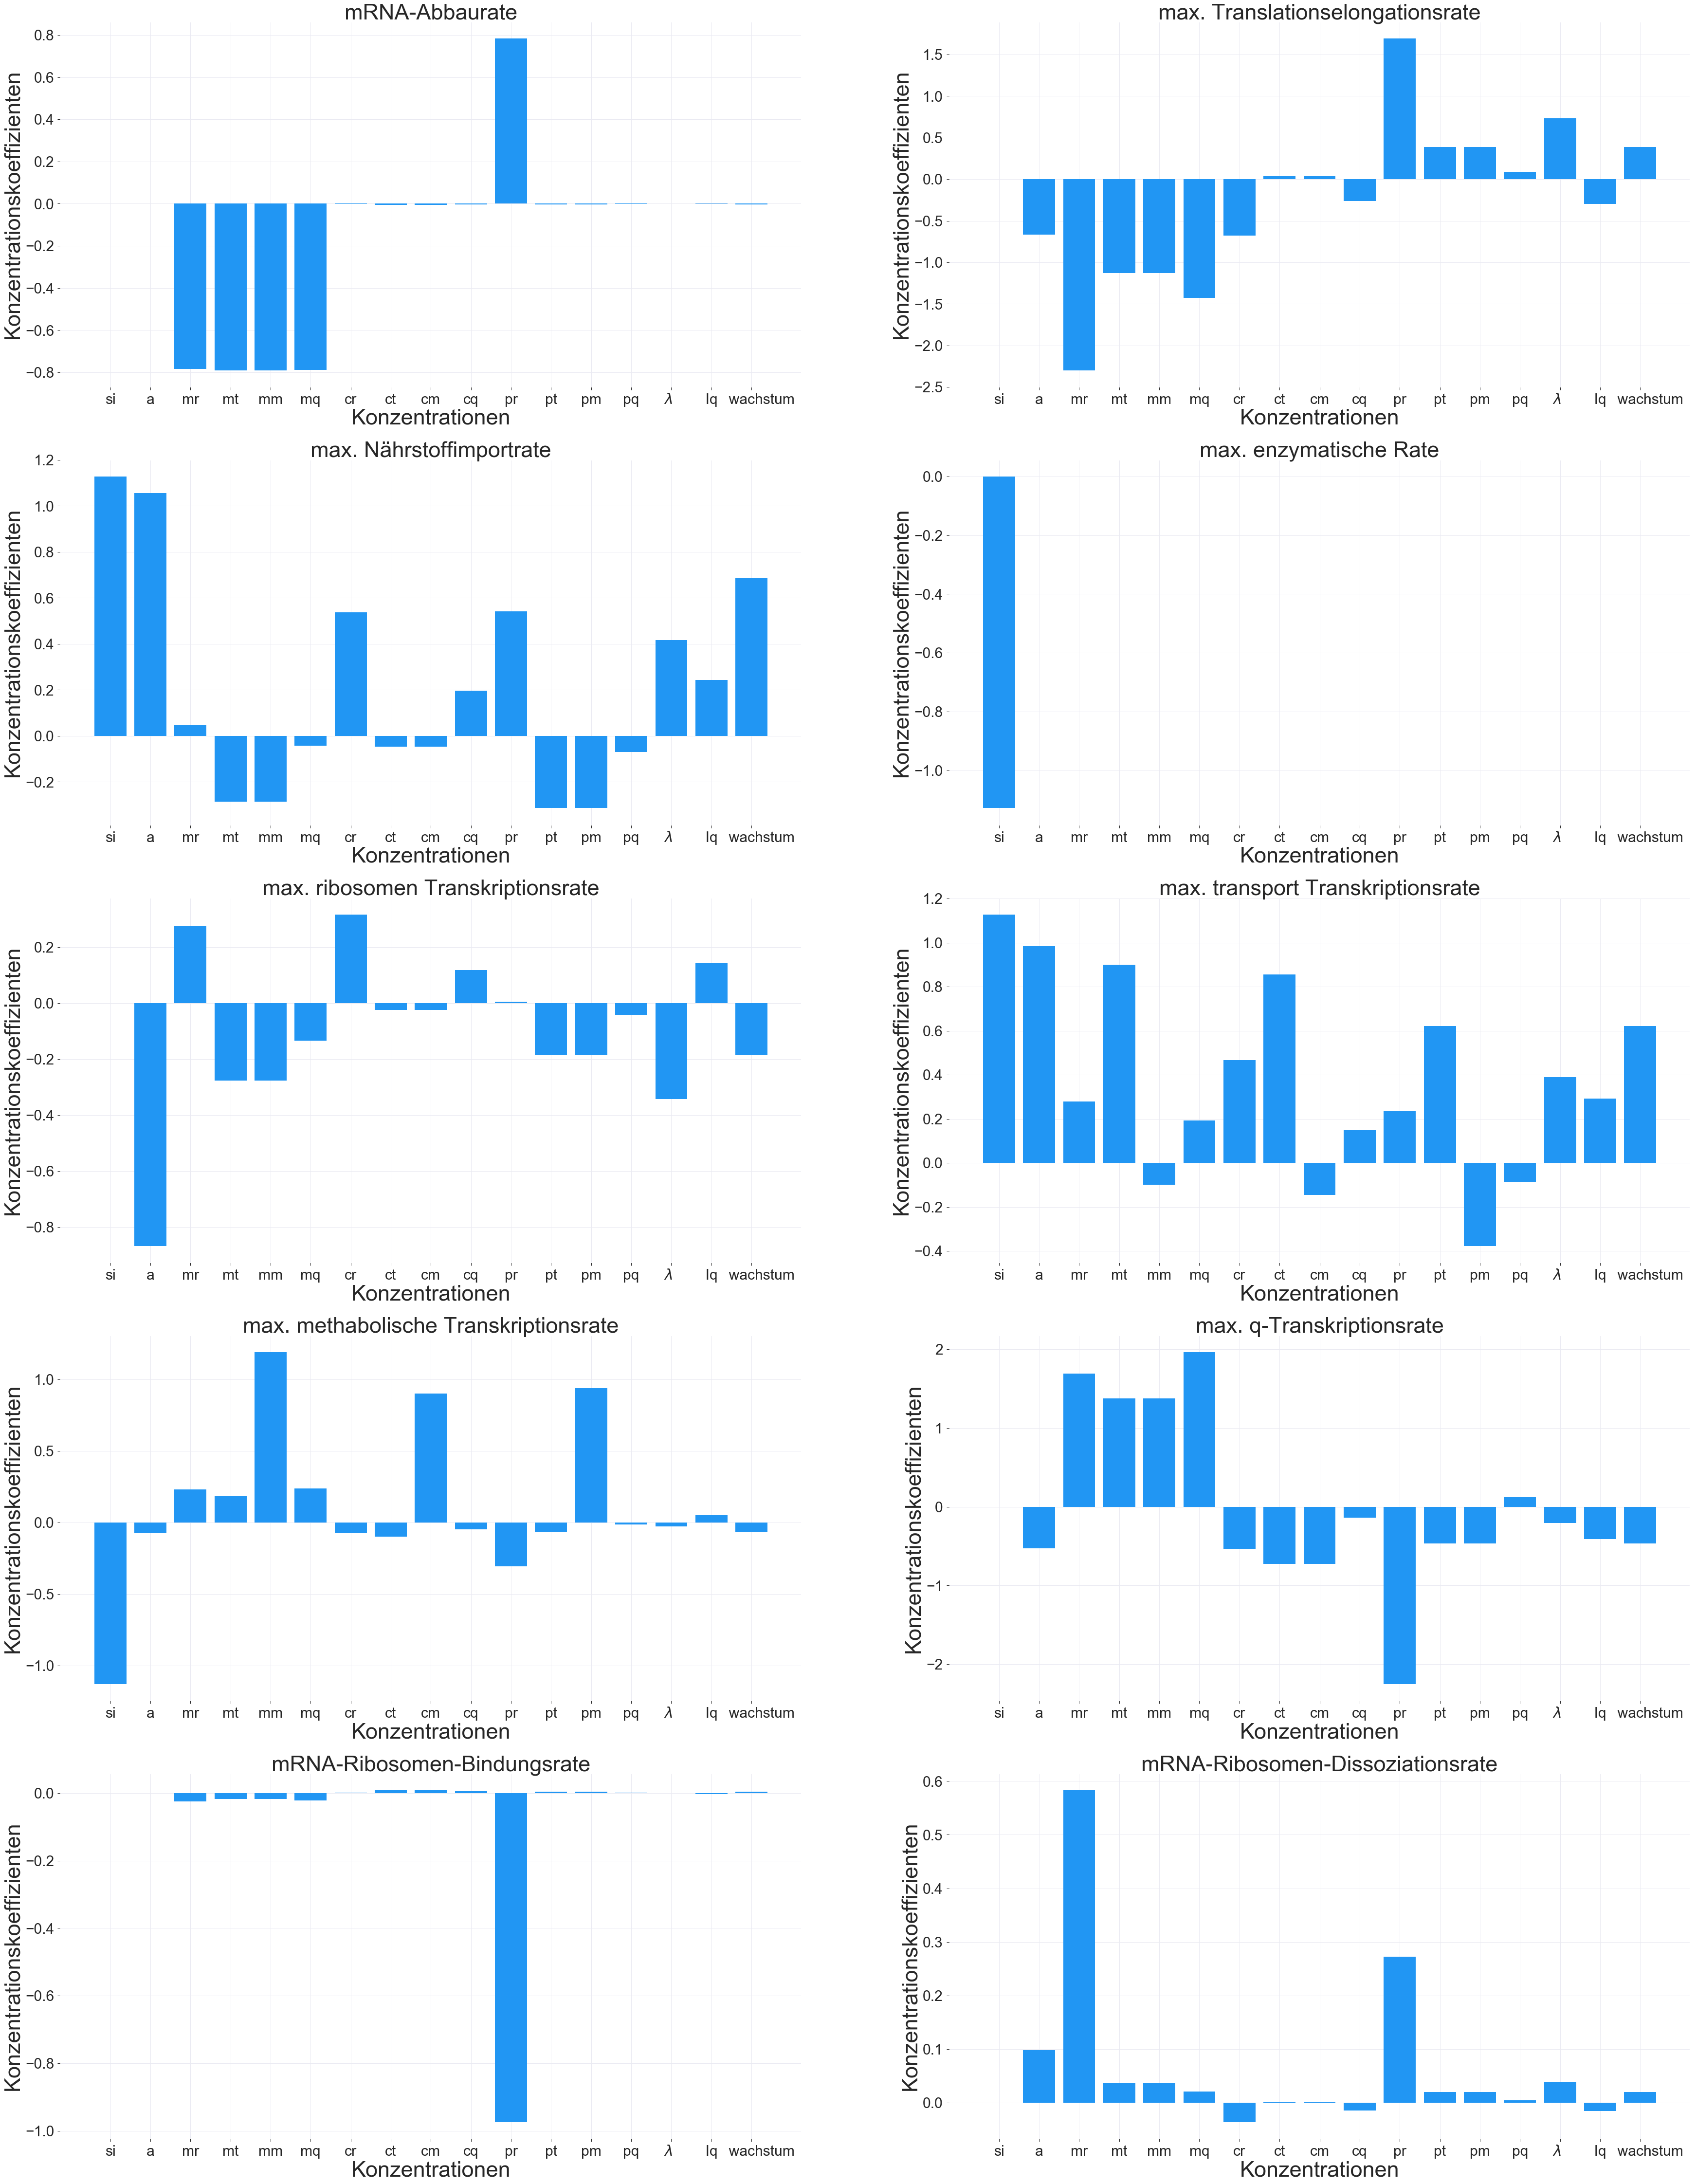

In [53]:
fig, Plotlist = plt.subplots(5,2,figsize=(60,80))
#plt.tight_layout()
Plotlist = Plotlist.ravel()


      



konzkofvimp = konzcoalle[0]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvimp
Plotlist[0].bar(x,y)
Plotlist[0].set_title('mRNA-Abbaurate', size = 45)
Plotlist[0].set_xlabel('Konzentrationen', size = 45)
Plotlist[0].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[0].tick_params(**{'labelsize': 30})


konzkofvcat = konzcoalle[1]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvcat
Plotlist[1].bar(x,y)
Plotlist[1].set_title('max. Translationselongationsrate', size = 45)
Plotlist[1].set_xlabel('Konzentrationen', size =45)
Plotlist[1].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[1].tick_params(**{'labelsize': 30})

konzkofvr = konzcoalle[2]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvr
Plotlist[2].bar(x,y)
Plotlist[2].set_title('max. Nährstoffimportrate', size = 45)
Plotlist[2].set_xlabel('Konzentrationen', size =45)
Plotlist[2].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[2].tick_params(**{'labelsize': 30})

konzkofvt = konzcoalle[3]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']

x = konzentrationen
y = konzkofvt
Plotlist[3].bar(x,y)
Plotlist[3].set_title('max. enzymatische Rate', size = 45)
Plotlist[3].set_xlabel('Konzentrationen', size = 45)
Plotlist[3].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[3].tick_params(**{'labelsize': 30})


konzkofvm = konzcoalle[4]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']

x = konzentrationen
y = konzkofvm
Plotlist[4].bar(x,y)
Plotlist[4].set_title('max. ribosomen Transkriptionsrate', size = 45)
Plotlist[4].set_xlabel('Konzentrationen', size = 45)
Plotlist[4].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[4].tick_params(**{'labelsize': 30})


konzkofvq = konzcoalle[5]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']

x = konzentrationen
y = konzkofvq
Plotlist[5].bar(x,y)
Plotlist[5].set_title('max. transport Transkriptionsrate', size = 45)
Plotlist[5].set_xlabel('Konzentrationen', size = 45)
Plotlist[5].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[5].tick_params(**{'labelsize': 30})

konzkofomegar = konzcoalle[6]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']

x = konzentrationen
y = konzkofomegar
Plotlist[6].bar(x,y)
Plotlist[6].set_title('max. methabolische Transkriptionsrate', size = 45)
Plotlist[6].set_xlabel('Konzentrationen', size = 45)
Plotlist[6].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[6].tick_params(**{'labelsize': 30})

konzkofomegat = konzcoalle[7]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']

x = konzentrationen
y = konzkofomegat
Plotlist[7].bar(x,y)
Plotlist[7].set_title('max. q-Transkriptionsrate', size = 45)
Plotlist[7].set_xlabel('Konzentrationen', size = 45)
Plotlist[7].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[7].tick_params(**{'labelsize': 30})

konzkofomegam = konzcoalle[8]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']

x = konzentrationen
y = konzkofomegam
Plotlist[8].bar(x,y)
Plotlist[8].set_title('mRNA-Ribosomen-Bindungsrate', size = 45)
Plotlist[8].set_xlabel('Konzentrationen', size = 45)
Plotlist[8].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[8].tick_params(**{'labelsize': 30})


konzkofomegaq = konzcoalle[9]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     $\lambda$       ', '       Iq       ', '       wachstum  ']


x = konzentrationen
y = konzkofomegaq
Plotlist[9].bar(x,y)
Plotlist[9].set_title('mRNA-Ribosomen-Dissoziationsrate', size = 45)
Plotlist[9].set_xlabel('Konzentrationen', size = 45)
Plotlist[9].set_ylabel('Konzentrationskoeffizienten', size = 45)
Plotlist[9].tick_params(**{'labelsize': 30})


#plt.tight_layout()



##### Plots zu Konzentrationskoefizienten

<BarContainer object of 17 artists>

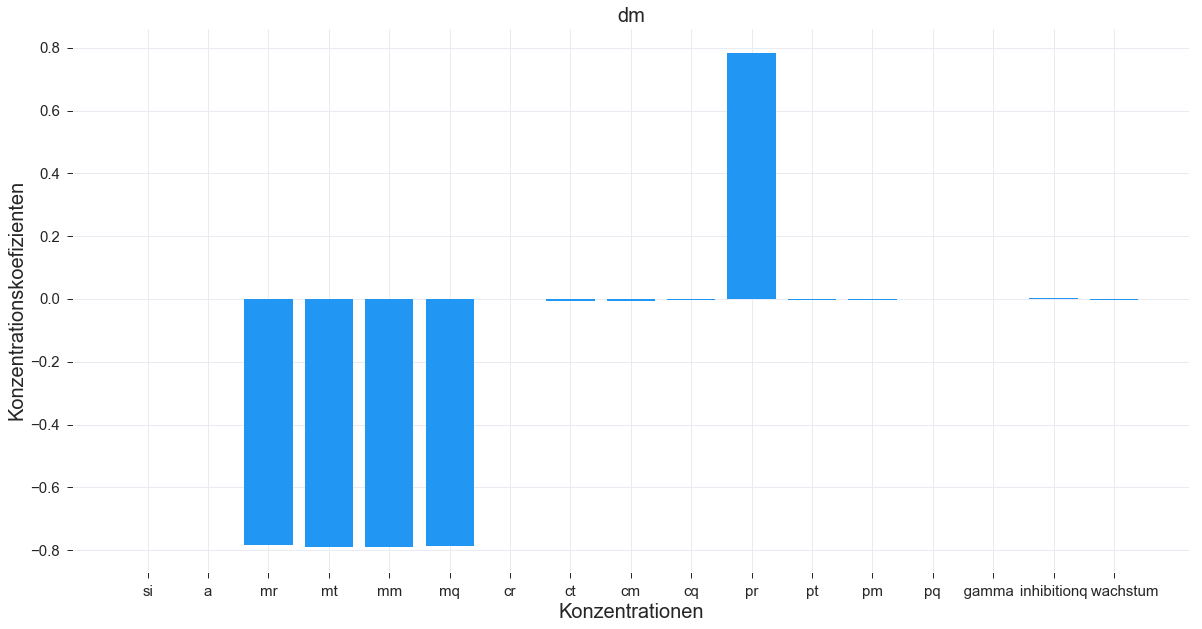

In [22]:
konzkofvimp = konzcoalle[0]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvimp
plt.figure(figsize=(20,10))
plt.title('dm', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

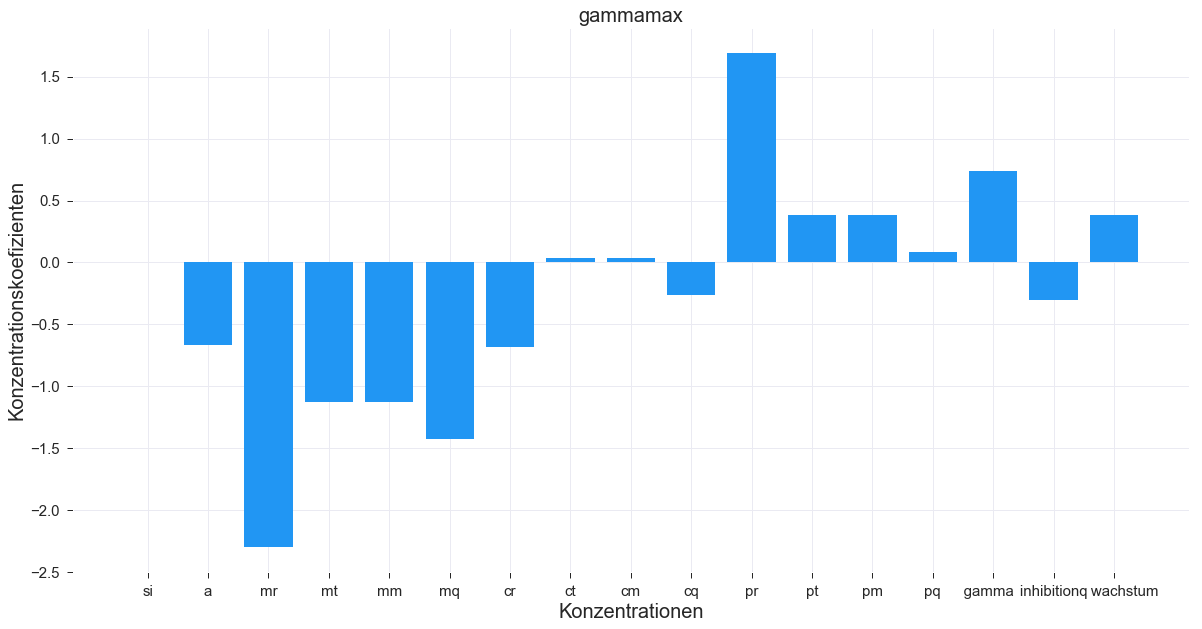

In [11]:
konzkofvcat = konzcoalle[1]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvcat
plt.figure(figsize=(20,10))
plt.title('gammamax', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

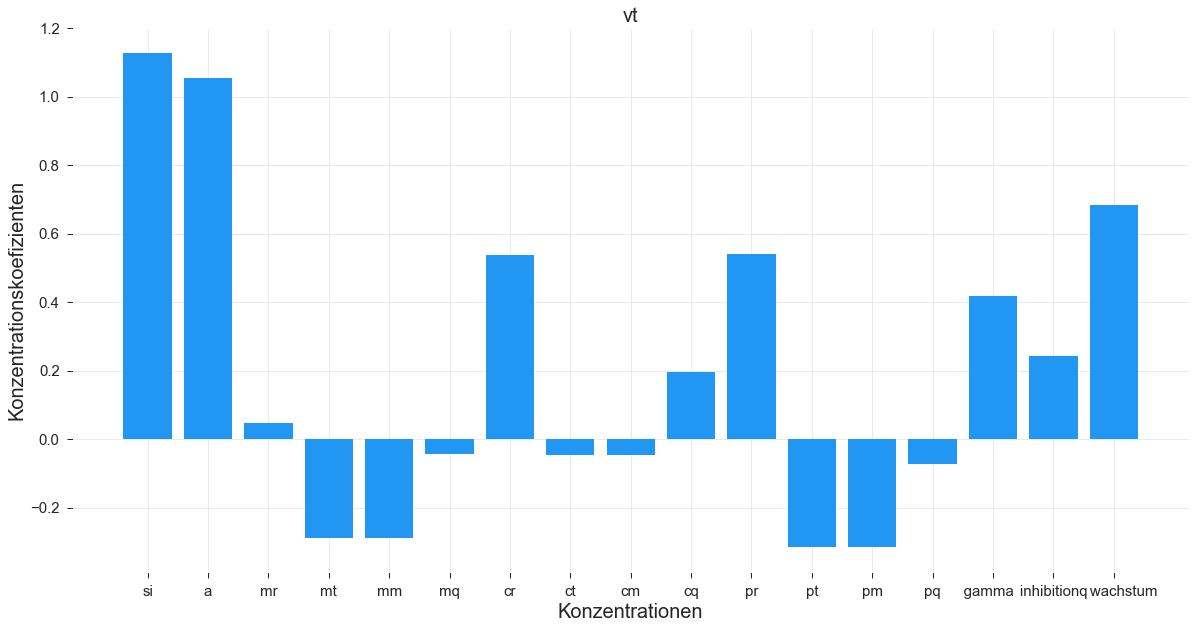

In [12]:
konzkofvr = konzcoalle[2]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvr
plt.figure(figsize=(20,10))
plt.title('vt', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

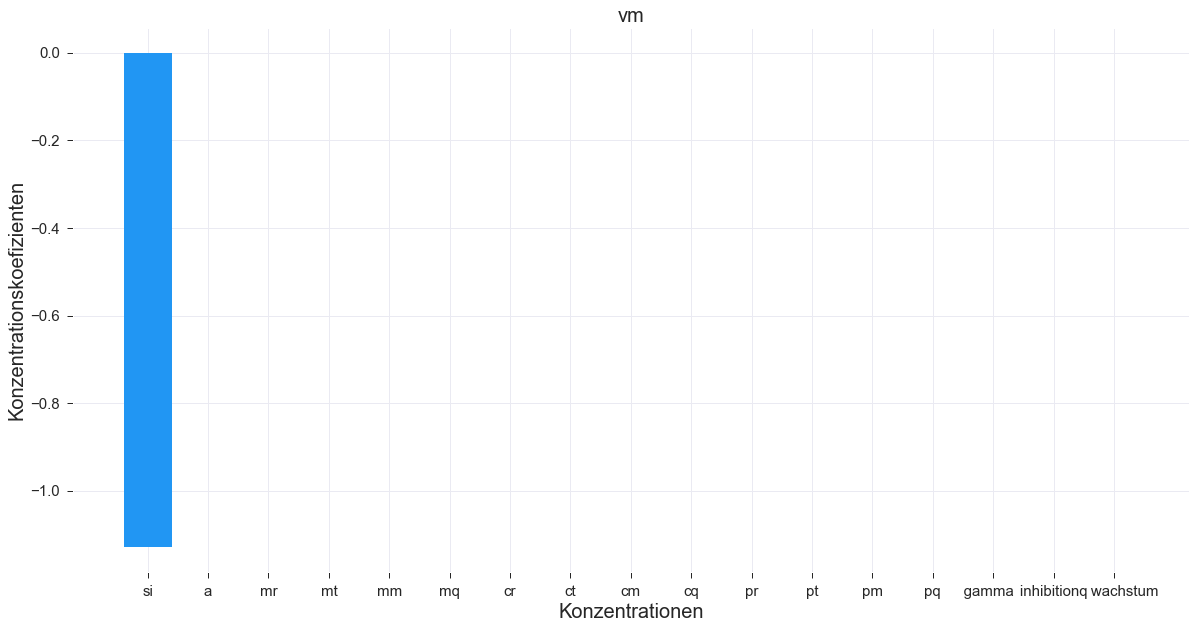

In [13]:
konzkofvt = konzcoalle[3]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']

x = konzentrationen
y = konzkofvt
plt.figure(figsize=(20,10))
plt.title('vm', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

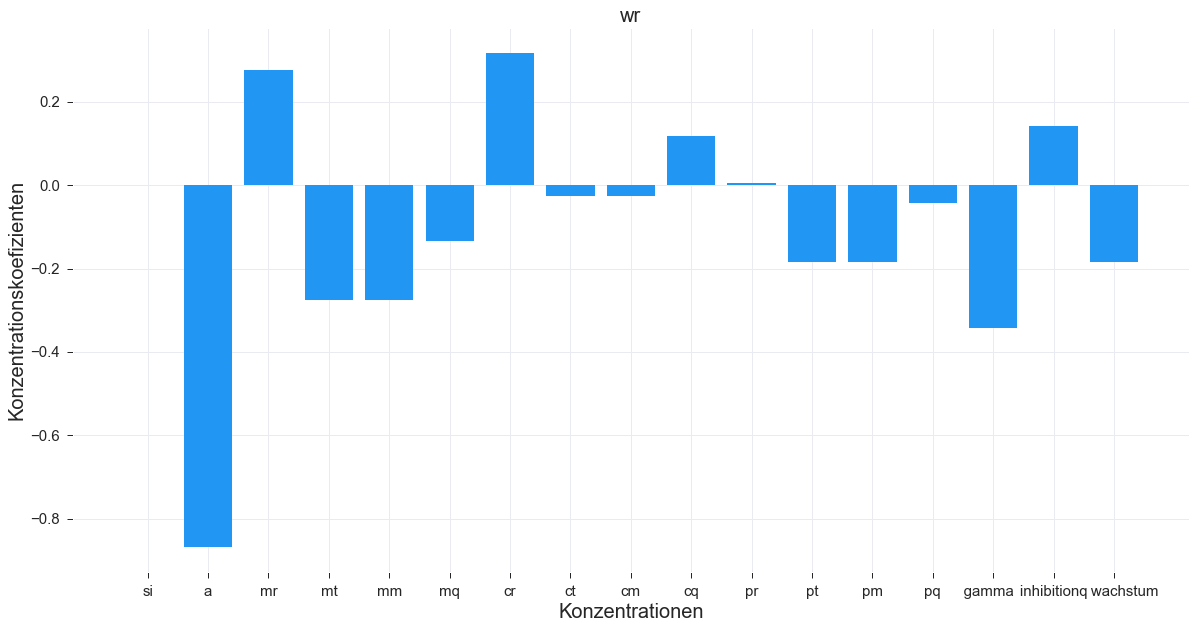

In [14]:
konzkofvm = konzcoalle[4]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']

x = konzentrationen
y = konzkofvm
plt.figure(figsize=(20,10))
plt.title('wr', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

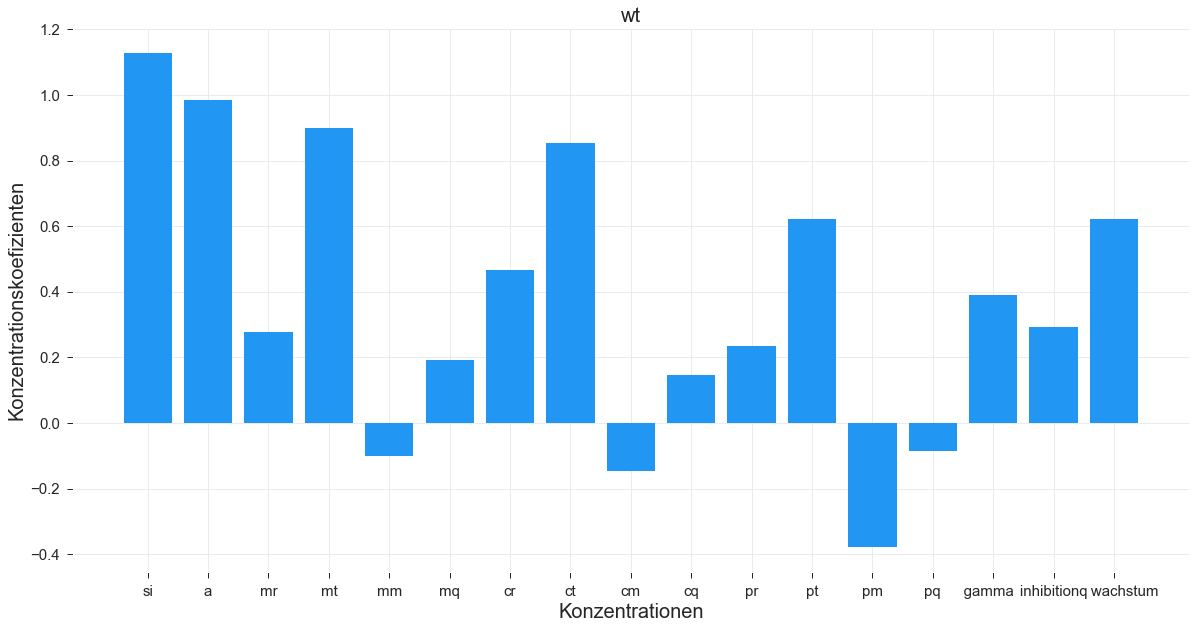

In [15]:
konzkofvq = konzcoalle[5]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']

x = konzentrationen
y = konzkofvq
plt.figure(figsize=(20,10))
plt.title('wt', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
#plt.axhline(0, color = 'black', linewidth = 0.5)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

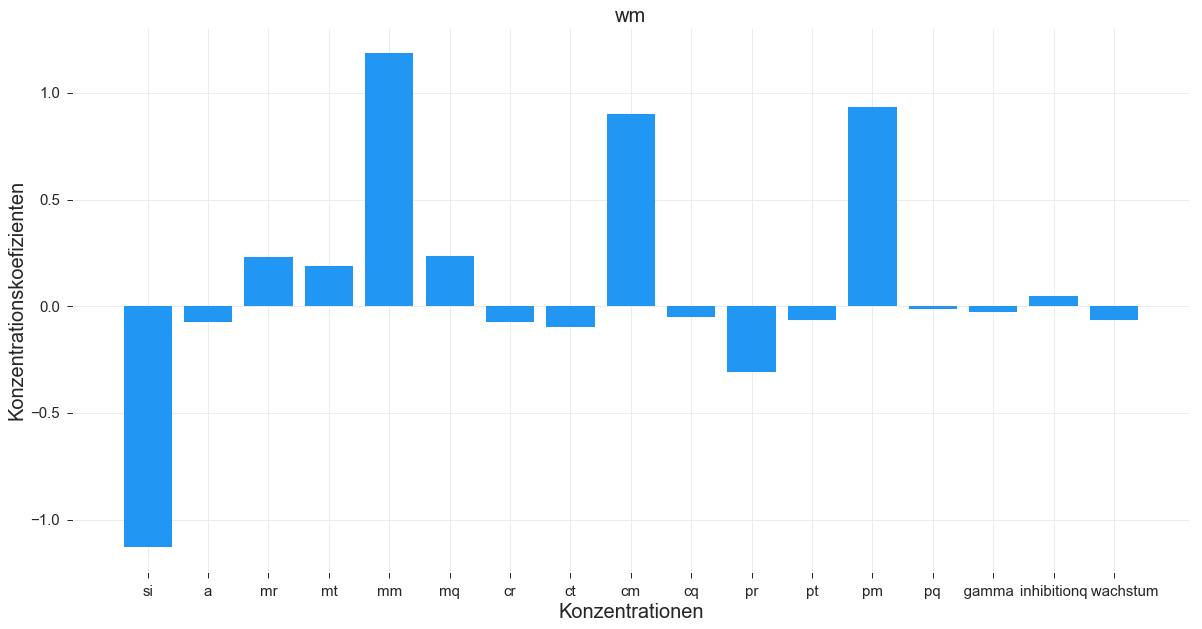

In [16]:
konzkofomegar = konzcoalle[6]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']

x = konzentrationen
y = konzkofomegar
plt.figure(figsize=(20,10))
plt.title('wm', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

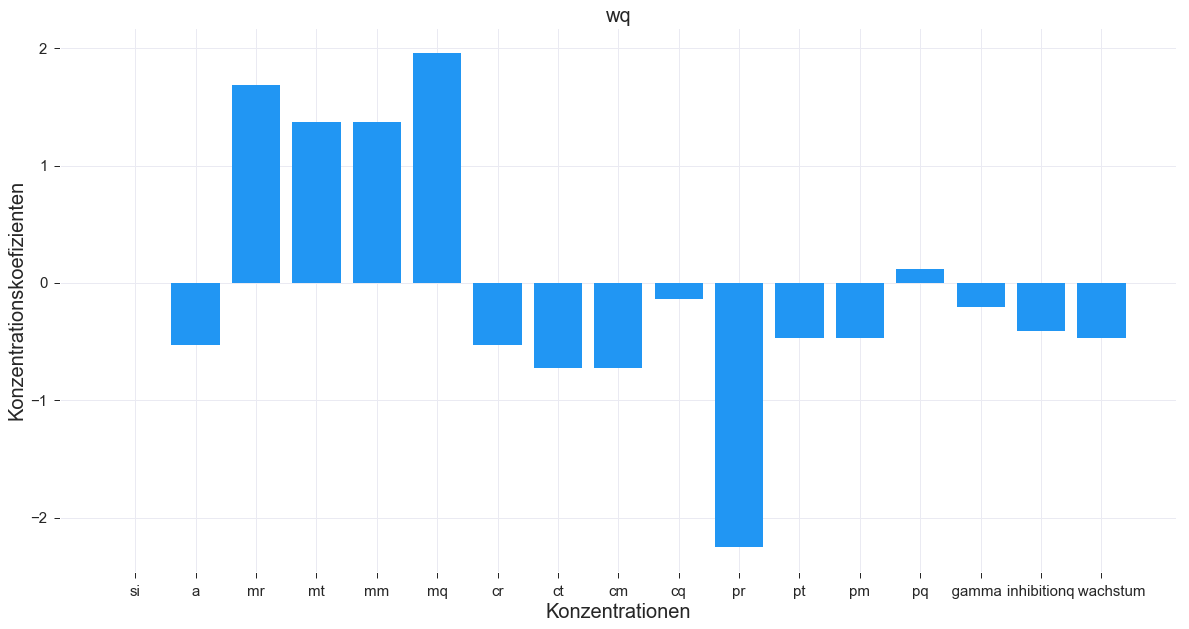

In [17]:
konzkofomegat = konzcoalle[7]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']

x = konzentrationen
y = konzkofomegat
plt.figure(figsize=(20,10))
plt.title('wq', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

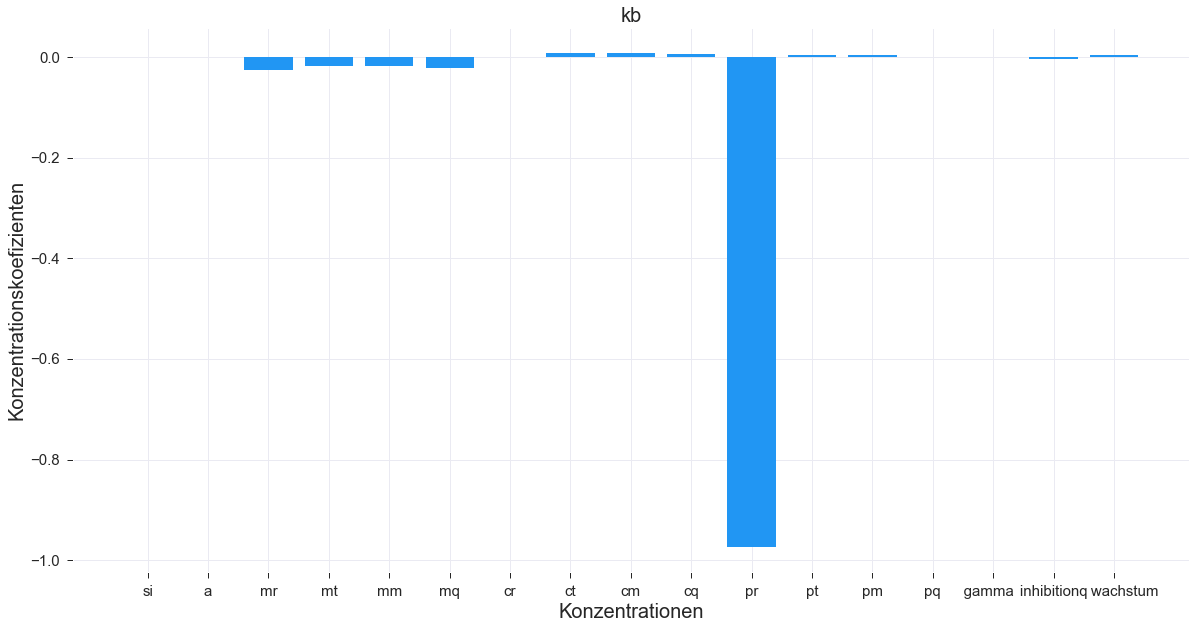

In [18]:
konzkofomegam = konzcoalle[8]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']

x = konzentrationen
y = konzkofomegam
plt.figure(figsize=(20,10))
plt.title('kb', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

<BarContainer object of 17 artists>

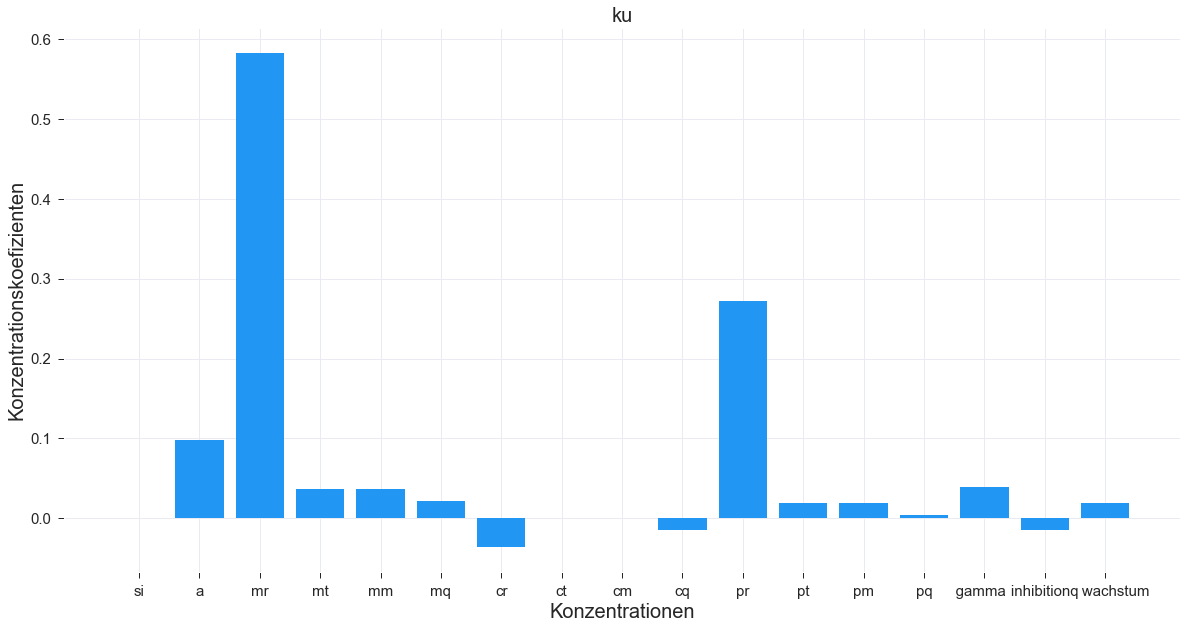

In [19]:
konzkofomegaq = konzcoalle[9]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']


x = konzentrationen
y = konzkofomegaq
plt.figure(figsize=(20,10))
plt.title('ku', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

In [ ]:
konzkofvimp = konzcoalle[10]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvimp
plt.figure(figsize=(20,10))
plt.title('vimp', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

In [ ]:
konzkofvcat = konzcoalle[11]
konzentrationen = ['si','a','mr','mt','mm','mq', 'cr','ct','cm','cq','pr','pt','pm','pq', '     gamma       ', '       inhibitionq       ', '       wachstum  ']


x = konzentrationen
y = konzkofvcat
plt.figure(figsize=(20,10))
plt.title('vimp', size = 20)
plt.xlabel('Konzentrationen', size = 20)
plt.ylabel('Konzentrationskoefizienten', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.bar(x,y)

### Konzentrationtskoefizienten über die Zeit

In [20]:
def konzenCtime(vt,x):
    # parameter den ich verändere
    oV = defaultParameters[vt]
    # wachstumswerte
    ov = s.getY()#[-1]#s.results[-1]['y'][-1]
    # um prozentzahl erhöhen oder erniedrigen
    d1V = oV*(1+(x*0.01))
    d2V = oV*(1-(x*0.01))
    
    def dv(vt):
        s1 = modelbase.Simulator(m)
        s1.model.par.update({vt:d1V})
        s1.timeCourse(np.linspace(0,3000,10),weise_values)
        a = s1.getY()#[-1]
        
        s2 = modelbase.Simulator(m)
        s2.model.par.update({vt:d2V})
        s2.timeCourse(np.linspace(0,3000,10),weise_values)
        b = s2.getY()#[-1]
        
        s1.model.par.update({vt: oV})
        s2.model.par.update({vt: oV})
        
        print(a)
        print(b)
        print(a-b)
        
        return a-b
    return (dv(vt)/ov)*(oV/(d1V-d2V))

In [207]:
parameter = ['dm','gammamax', 'vt', 'vm', 'wr', 'wt', 'wm', 'wq','kb', 'ku']

konzcoalletime = []

for i in parameter:
    konzcoalletime.append(konzenCtime(i,1))
    
konzcoalletime = np.array(konzcoalletime)

[[3.10961920e+04 4.32975020e+04 8.51455800e+03 4.93330000e+01
  4.93330000e+01 8.81196000e+03 3.48675000e+02 0.00000000e+00
  3.57898000e+02 0.00000000e+00 4.14000000e-02 4.71364000e+02
  4.71364000e+02 4.71364000e+02 1.25979633e+03 1.00000000e+00
  8.90138069e-03]
 [1.09366542e+02 4.77570350e+00 8.16537478e+01 1.91979678e+01
  1.91979678e+01 1.85563692e+03 8.05871852e+01 7.57035892e+00
  7.57035892e+00 7.33713091e+02 1.07102878e+00 1.28437832e+03
  1.48251525e+03 1.71405371e+05 5.11000163e+02 3.83470313e-01
  4.23844483e-03]
 [1.28375133e+02 1.06167145e+01 3.44868963e+01 1.00283062e+01
  1.00283062e+01 3.25356486e+02 7.55560883e+02 6.95825901e+01
  6.95825901e+01 2.25750072e+03 2.46689309e+01 7.25336625e+03
  7.25484055e+03 2.38806269e+05 7.59339107e+02 1.41689310e-01
  2.39360907e-02]
 [1.28404567e+02 1.06994238e+01 3.37842683e+01 9.84271844e+00
  9.84271844e+00 3.19693259e+02 7.62856629e+02 7.02567887e+01
  7.02567887e+01 2.28195309e+03 2.54338634e+01 7.35210515e+03
  7.35210561e+03

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


[[3.10961920e+04 4.32975020e+04 8.51455800e+03 4.93330000e+01
  4.93330000e+01 8.81196000e+03 3.48675000e+02 0.00000000e+00
  3.57898000e+02 0.00000000e+00 4.14000000e-02 4.71364000e+02
  4.71364000e+02 4.71364000e+02 1.27239429e+03 1.00000000e+00
  8.99039450e-03]
 [1.09238135e+02 4.69841188e+00 8.10078683e+01 1.92167490e+01
  1.92167490e+01 1.86044805e+03 7.97323749e+01 7.55620417e+00
  7.55620417e+00 7.33524563e+02 1.06811052e+00 1.28299967e+03
  1.48249310e+03 1.71357733e+05 5.11112023e+02 3.83733210e-01
  4.23389532e-03]
 [1.28375423e+02 1.05467610e+01 3.39741106e+01 9.99562858e+00
  9.99562858e+00 3.23316941e+02 7.50549602e+02 6.96221168e+01
  6.96221168e+01 2.25196148e+03 2.48937859e+01 7.28237109e+03
  7.28383668e+03 2.39015535e+05 7.64916559e+02 1.41263752e-01
  2.40318066e-02]
 [1.28404568e+02 1.06284819e+01 3.32779978e+01 9.80940714e+00
  9.80940714e+00 3.17656131e+02 7.57706022e+02 7.02876826e+01
  7.02876826e+01 2.27611241e+03 2.56656766e+01 7.38066390e+03
  7.38066435e+03

NameError: name 'konzcoalletime' is not defined

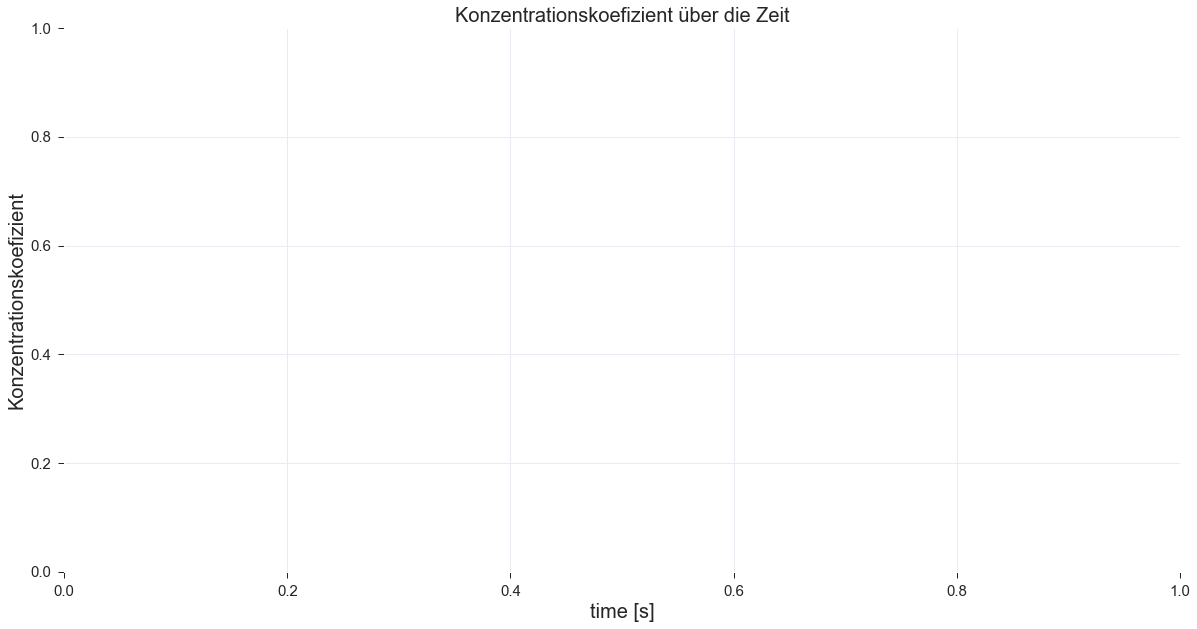

In [21]:
plt.figure(figsize=(20,10))
plt.title('Konzentrationskoefizient über die Zeit', size = 20)
plt.xlabel('time [s]', size = 20)
plt.ylabel('Konzentrationskoefizient', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
lines = plt.plot(s.getT(),konzcoalletime[0][:,16])
#plt.legend(lines[:14], cl, prop = {'size': 20}, loc = 'center right', frameon=True, ncol=2)

plt.draw_if_interactive()
plt.show()

### Parameterveränderung

In [78]:
def konzenC(vt,x):
    # parameter den ich verändere
    oV = defaultParameters[vt]
    # wachstumswerte
    ov = s.getY()[-1]#s.results[-1]['y'][-1]
    # um prozentzahl erhöhen oder erniedrigen
    d1V = oV*(1+(x*0.01))
    d2V = oV*(1-(x*0.01))
    
    def dv(vt):
        s1 = modelbase.Simulator(m)
        s1.model.par.update({vt:d1V})
        s1.timeCourse(np.linspace(0,3000,100),weise_values)
        a = s1.getY()[-1]
        
        s2 = modelbase.Simulator(m)
        s2.model.par.update({vt:d2V})
        s2.timeCourse(np.linspace(0,3000,100),weise_values)
        b = s2.getY()[-1]
        
        s1.model.par.update({vt: oV})
        s2.model.par.update({vt: oV})
        
        #print(a)
        #print(b)
        #print(a-b)
        
        return a-b
    return (dv(vt)/ov)*(oV/(d1V-d2V))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/integrate/_ode.py:1348: UserWarning: lsoda: Excess work done on this call (perhaps wrong Dfun type).
  self.messages.get(istate, unexpected_istate_msg)))


[1.26971821e+02 1.06993966e+01 3.40489668e+01 9.92041691e+00
 9.92041691e+00 3.22208841e+02 7.62864260e+02 7.02616856e+01
 7.02616856e+01 2.28205493e+03 2.52364074e+01 7.35237300e+03
 7.35237300e+03 2.38800406e+05 7.61677928e+02 1.41701254e-01
 2.42628129e-02]
[1.29870035e+02 1.06993965e+01 3.40489668e+01 9.92041695e+00
 9.92041695e+00 3.22208841e+02 7.62864254e+02 7.02616857e+01
 7.02616857e+01 2.28205492e+03 2.52364072e+01 7.35237303e+03
 7.35237303e+03 2.38800406e+05 7.61677924e+02 1.41701253e-01
 2.42628127e-02]
[-2.89821316e+00  1.63676907e-07  2.38142235e-08 -4.12348822e-08
 -4.12348822e-08 -2.02082560e-07  5.94898290e-06 -4.73518469e-08
 -4.73518469e-08  6.51630080e-06  1.98390513e-07 -3.35077675e-05
 -3.35077675e-05 -2.45491276e-04  4.60828232e-06  5.00118807e-10
  2.41018160e-10]
[1.26971821e+02 1.06993966e+01 3.40489668e+01 9.92041691e+00
 9.92041691e+00 3.22208841e+02 7.62864260e+02 7.02616856e+01
 7.02616856e+01 2.28205493e+03 2.52364074e+01 7.35237300e+03
 7.35237300e+03 2

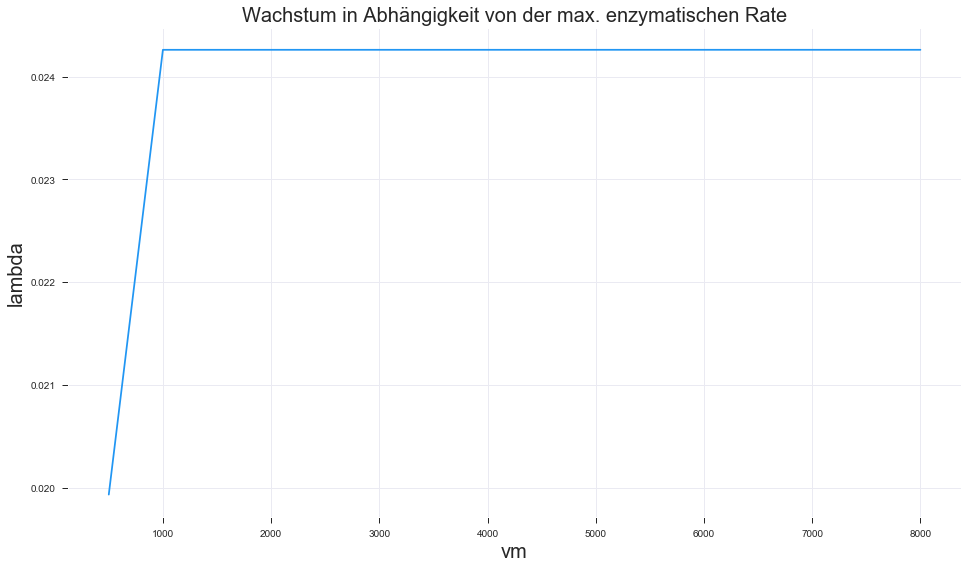

In [65]:
lambdawertvm = []
konzencwerte = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
vm = 500

while i <= 16:
    m.par.update({'vm': vm})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertvm.append(s.getY()[:,16][-1])
    konzencwerte.append(konzenC('vm',1))
    
    i += 1
    vm += 500


    
    
#modelvmwert = []
#mvm = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
#weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

#mvm.par.update({'vm': 8500})
#svm = modelbase.Simulator(mvm)
#svm.timeCourse(np.linspace(0,3000,100),weise_values);
#modelvmwert.append(svm.getY()[:,16][-1])


    
xvm = range(500,8001,500)
y = lambdawertvm
#plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. enzymatischen Rate', size = 20)
plt.xlabel('vm', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(xvm,y)
#plt.plot(5800,modelvmwert,'og', label ='max. enzymatic rate \n of the model = 5800')
#plt.legend(loc = 'center right', prop={'size': 15})
#plt.legend(bbox_to_anchor=[1.1,1])

print (len(lambdawertvm))
print (len(konzencwerte))
print (konzencwerte)



In [67]:
konzencwerte = np.array(konzencwerte)

In [72]:
konzerwerte1 = konzencwerte[:,16]

In [75]:
konzerwerte2 = konzerwerte1.tolist()

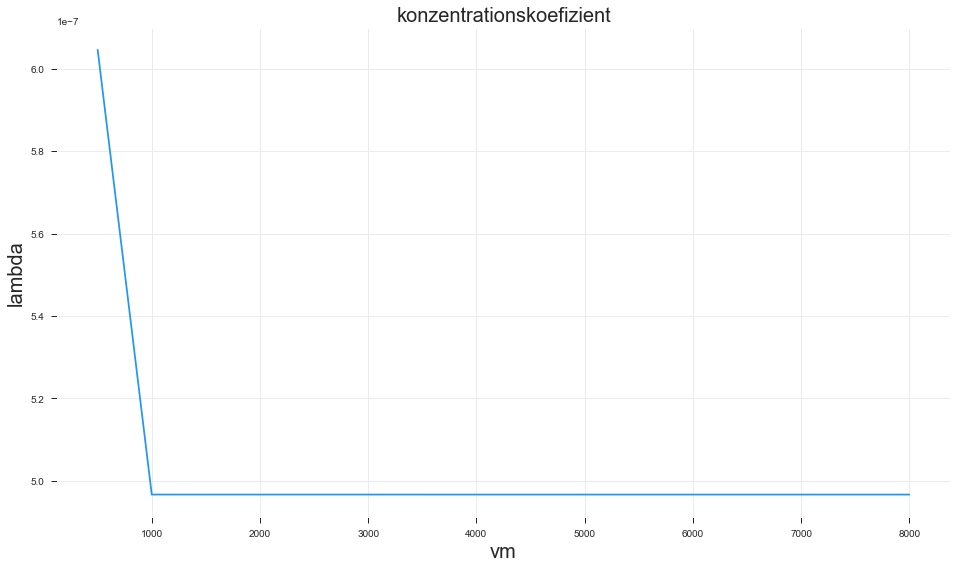

In [77]:
xvm = range(500,8001,500)
y = konzerwerte2
#plt.figure(figsize=(20,10))
plt.title('konzentrationskoefizient', size = 20)
plt.xlabel('vm', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(xvm,y)

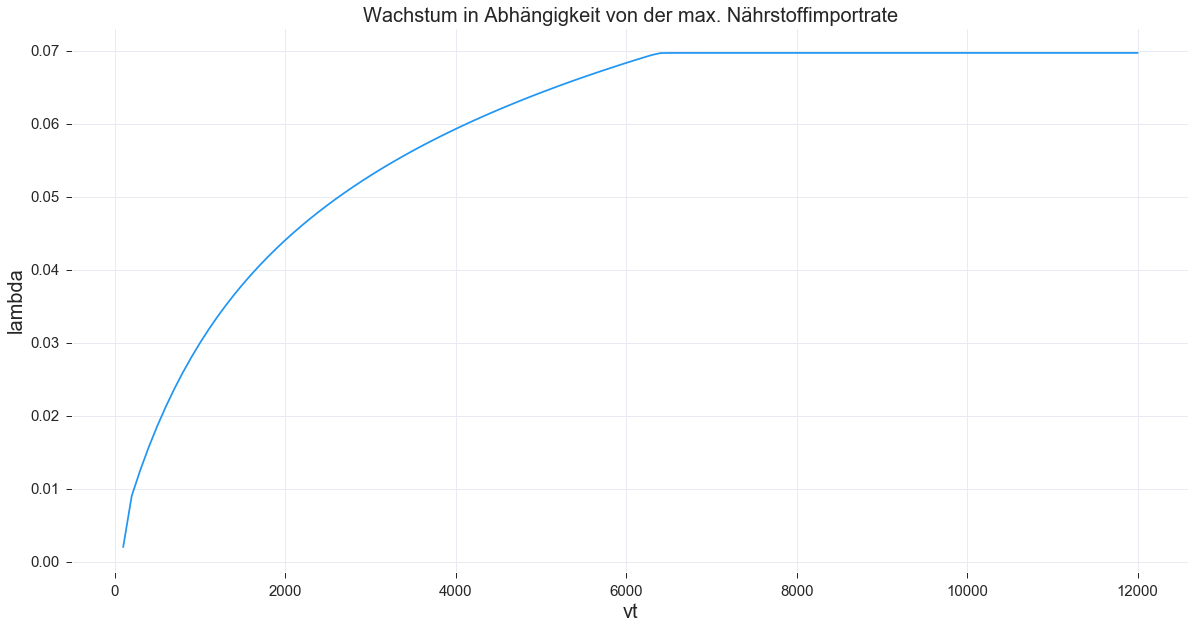

In [79]:
konzencwertevt = []
lambdawertvt = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
vt = 100

while i <= 120:
    m.par.update({'vt': vt})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertvt.append(s.getY()[:,16][-1])
    konzencwertevt.append(konzenC('vt',1))
    
    i += 1
    vt += 100
    
    
#modelvtwert = []
#mvt = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
#weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

#mvt.par.update({'vt': 726})
#svt = modelbase.Simulator(mvt)
#svt.timeCourse(np.linspace(0,3000,100),weise_values);
#modelvtwert.append(svt.getY()[:,16][-1])

    
xvt = range(100,12001,100)#[200,400,600,800,1000,1200,1400,1600]
y = lambdawertvt
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. Nährstoffimportrate', size = 20)
plt.xlabel('vt', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)

plt.plot(xvt,y)
#plt.plot(726,modelvtwert,'og', label ='max. nutrient import rate of the model = 726')
#plt.legend(loc = 'center right', prop={'size': 15})

#lambdawertvt


In [88]:
konzencwertevt = np.array(konzencwertevt)
konzerwertevt1 = konzencwertevt[:,16]
konzerwertevt2 = konzerwertevt1.tolist()


IndexError: too many indices for array

In [87]:
konzencwertevt

array([8.34057398, 1.85038866, 1.32889446, 1.05996897, 0.89514997,
       0.78357066, 0.70294137, 0.64191233, 0.5940829 , 0.55556516,
       0.52386009, 0.4972881 , 0.47467881, 0.45519194, 0.43820877,
       0.42326382, 0.41000026, 0.3981401 , 0.38746356, 0.37779467,
       0.36899087, 0.36093549, 0.35353211, 0.34670036, 0.34037272,
       0.33449205, 0.32900965, 0.32388379, 0.31907845, 0.31456242,
       0.31030849, 0.30629284, 0.30249451, 0.298895  , 0.29547787,
       0.29222854, 0.28913395, 0.2861824 , 0.28336338, 0.28066742,
       0.27808594, 0.27561118, 0.27323608, 0.27095419, 0.26875965,
       0.26664708, 0.26461154, 0.26264851, 0.26075382, 0.25892362,
       0.25715435, 0.25544273, 0.25378572, 0.25218048, 0.25062441,
       0.24911506, 0.24765019, 0.2462277 , 0.24484571, 0.24350254,
       0.24219693, 0.2409288 , 0.23970544, 0.23879635, 0.23872754,
       0.23871854, 0.23871511, 0.23871331, 0.23871219, 0.23871144,
       0.23871089, 0.23871048, 0.23871016, 0.2387099 , 0.23870

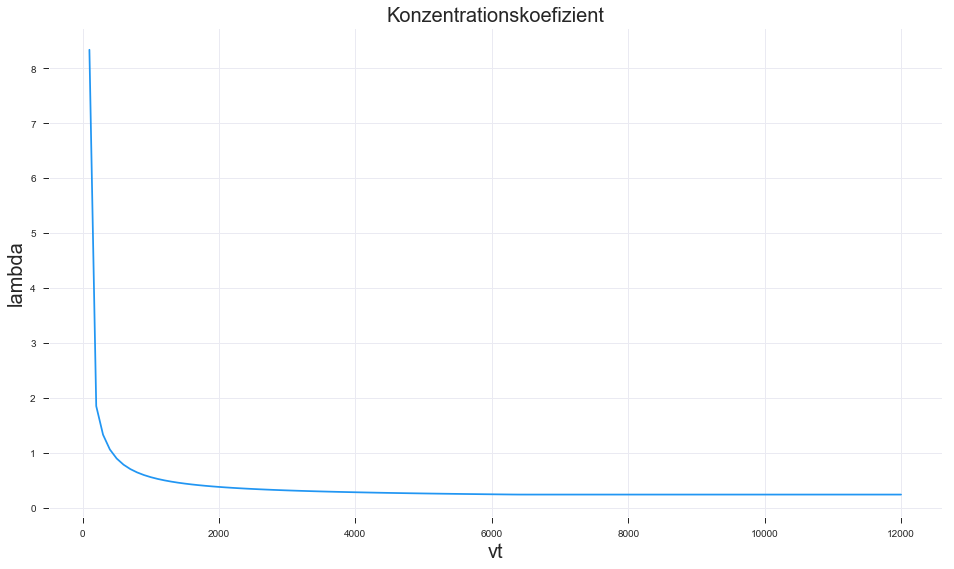

In [89]:
xvt = range(100,12001,100)#[200,400,600,800,1000,1200,1400,1600]
y = konzerwertevt2
#plt.figure(figsize=(20,10))
plt.title('Konzentrationskoefizient', size = 20)
plt.xlabel('vt', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(xvt,y)

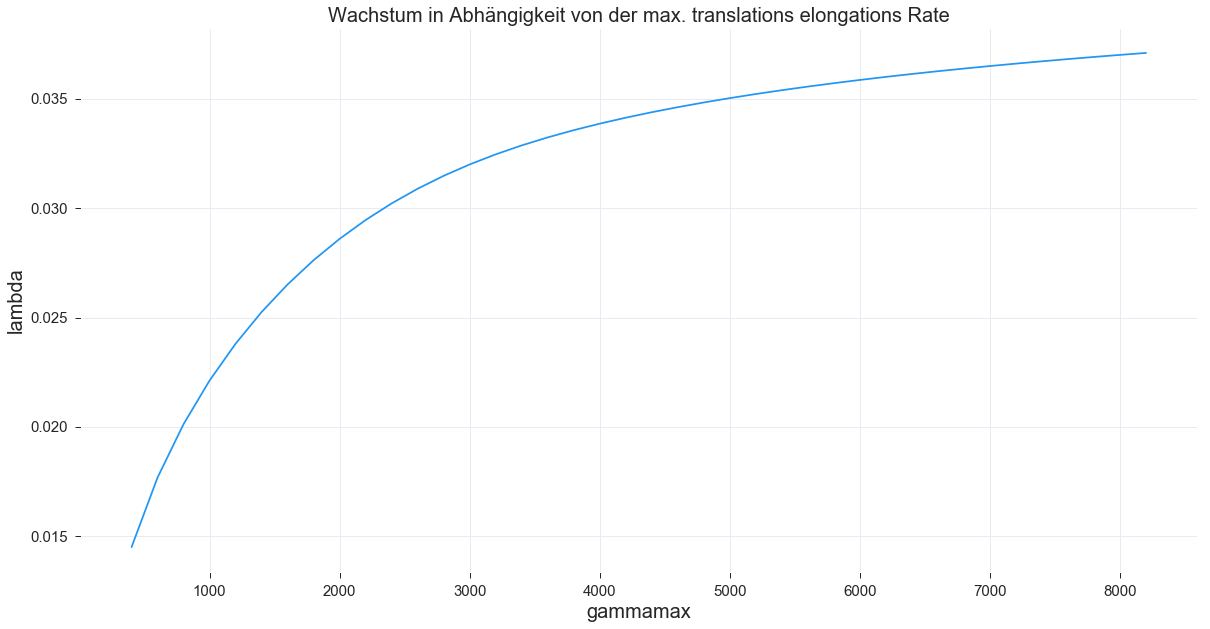

In [90]:
konzencwertegammamax = []
lambdawertgammamax = []

m= WeisseBaseModel()
s = modelbase.Simulator(m)

i = 1
gammamax = 400

while i <= 40:
    m.par.update({'gammamax': gammamax})
    #                         ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
    weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])  
    s.timeCourse(np.linspace(0,3000,100),weise_values)
    lambdawertgammamax.append(s.getY()[:,16][-1])
    konzencwertegammamax.append(konzenC('gammamax',1))
    
    i += 1
    gammamax += 200

    
xgammamax = range(400,8201,200)
y = lambdawertgammamax
plt.figure(figsize=(20,10))
plt.title('Wachstum in Abhängigkeit von der max. translations elongations Rate', size = 20)
plt.xlabel('gammamax', size = 20)
plt.ylabel('lambda', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)



#modelgammamaxwert = []
#mgammamax = WeisseBaseModel()
#                        ['si',       'a',     'mr',     'mt',   'mm',    'mq',    'cr', 'ct', 'cm', 'cq', 'pr',   'pt',    'pm',     'pq']
#weise_values = np.array([31096.192, 43297.502, 8514.558, 49.333, 49.333, 8811.960, 348.675, 0, 357.898, 0, 0.0414, 471.364, 471.364 , 471.364])

#mgammamax.par.update({'gammamax': 1260})
#sgammamax = modelbase.Simulator(mgammamax)
#sgammamax.timeCourse(np.linspace(0,3000,100),weise_values);
#modelgammamaxwert.append(sgammamax.getY()[:,16][-1])


plt.plot(xgammamax,y)
#plt.plot(1260,modelgammamaxwert,'og', label ='max. transl. elongation rate of the model = 1260')
#plt.legend(loc = 'center right', prop={'size': 15})


#letzter lambdawert bei unterschiedlichen gammamax
#lambdawertgammamax


In [91]:
konzencwertegammamax = np.array(konzencwertegammamax)
konzerwertegammamax1 = konzencwertegammamax[:,16]
konzerwertegammax2 = konzerwertegammamax1.tolist()

In [92]:
konzerwertegammax2

[0.6474644109165598,
 0.5309116630220831,
 0.4664847401634266,
 0.4244249254144349,
 0.39439759778367056,
 0.3717547825014762,
 0.3540481761936381,
 0.33984601300232786,
 0.32824705855573616,
 0.3186511239248351,
 0.31063835392660766,
 0.3039003995158596,
 0.29819959398759743,
 0.29334526081263446,
 0.28918098783077334,
 0.28557815999532765,
 0.2824321273130651,
 0.27965893752519694,
 0.2771919964122342,
 0.274978775562849,
 0.27297783995097963,
 0.27115635686159595,
 0.26948811233703707,
 0.267951980555087,
 0.2665307625334311,
 0.26521031112695737,
 0.26397887190637126,
 0.2628265846332705,
 0.261745103645289,
 0.260727306367651,
 0.2597670674307367,
 0.2588590819562928,
 0.2579987259893867,
 0.2571819452384136,
 0.2564051655834563,
 0.2556652204761343,
 0.25495929156387864,
 0.25428485975756004,
 0.25363966461512816,
 0.25302167040014084]

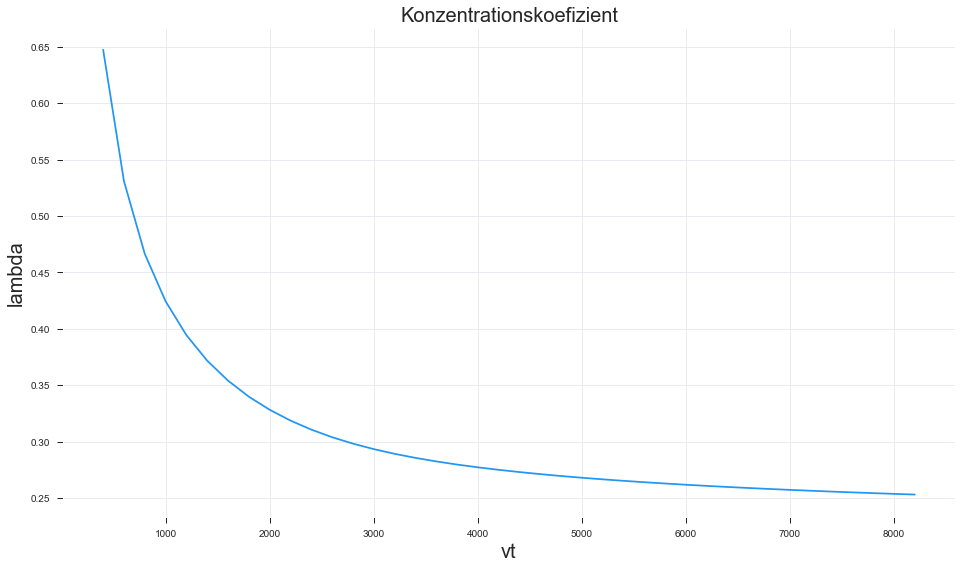

In [167]:
xgammamax = range(400,8201,200)#[200,400,600,800,1000,1200,1400,1600]
y = konzerwertegammax2
#plt.figure(figsize=(20,10))
plt.title('Konzentrationskoefizient', size = 20)
plt.xlabel('vt', size = 20)
plt.ylabel('lambda', size = 20)
#plt.xticks(size = 15)
#plt.yticks(size = 15)

plt.plot(xgammamax,y)